In [1]:
import random
import time
import matplotlib.pyplot as plt

DNA Generator

In [2]:
def generate_dna(length):
    return ''.join(random.choice("ACGT") for _ in range(length))

In [3]:
def compute_lps(pattern):
    m = len(pattern)
    lps = [0] * m
    length = 0
    i = 1

    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps

def kmp(text, pattern):
    lps = compute_lps(pattern)
    i = j = 0
    n, m = len(text), len(pattern)

    while i < n:
        if text[i] == pattern[j]:
            i += 1
            j += 1
        if j == m:
            j = lps[j - 1]
        elif i < n and text[i] != pattern[j]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1


Boyer–Moore (Bad-Character only)

In [4]:
def boyer_moore(text, pattern):
    n, m = len(text), len(pattern)
    bad_char = {pattern[i]: i for i in range(m)}

    shift = 0
    while shift <= n - m:
        j = m - 1
        while j >= 0 and pattern[j] == text[shift + j]:
            j -= 1
        if j < 0:
            shift += 1
        else:
            shift += max(1, j - bad_char.get(text[shift + j], -1))

KMP Algorithm

In [5]:
def compute_lps(pattern):
    m = len(pattern)
    lps = [0] * m
    length = 0
    i = 1

    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps

def kmp(text, pattern):
    lps = compute_lps(pattern)
    i = j = 0
    n, m = len(text), len(pattern)

    while i < n:
        if text[i] == pattern[j]:
            i += 1
            j += 1
        if j == m:
            j = lps[j - 1]
        elif i < n and text[i] != pattern[j]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1


Rabin–Karp

In [6]:
def rabin_karp(text, pattern):
    n, m = len(text), len(pattern)
    base = 256
    mod = 101

    h = 1
    for _ in range(m - 1):
        h = (h * base) % mod

    hash_p = 0
    hash_t = 0

    for i in range(m):
        hash_p = (hash_p * base + ord(pattern[i])) % mod
        hash_t = (hash_t * base + ord(text[i])) % mod

    for i in range(n - m + 1):
        if hash_p == hash_t:
            if text[i:i+m] == pattern:
                pass
        if i < n - m:
            hash_t = (hash_t - ord(text[i]) * h) % mod
            hash_t = (hash_t * base + ord(text[i + m])) % mod
            hash_t = (hash_t + mod) % mod

Benchmarking & Plotting

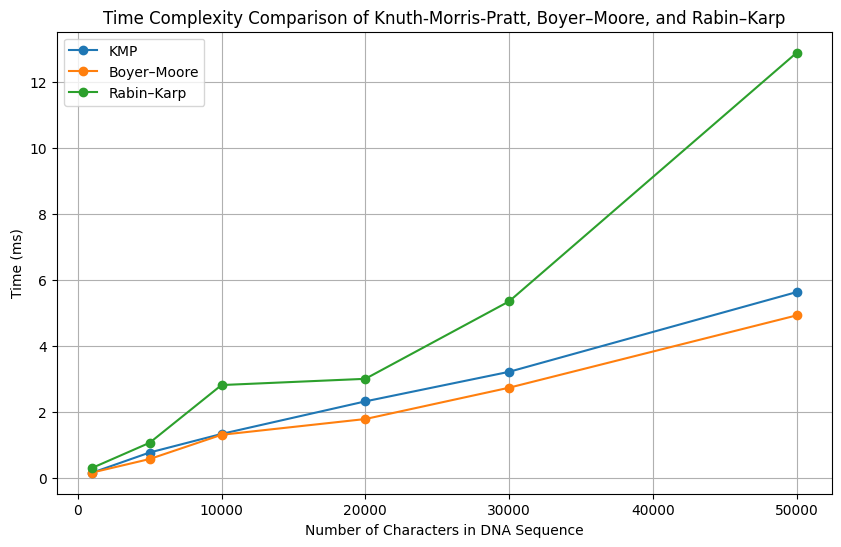

In [7]:
sizes = [1000, 5000, 10000, 20000, 30000, 50000]
kmp_times = []
bm_times = []
rk_times = []

pattern = "ACGTACGTACGT"  # fixed pattern for fairness

for size in sizes:
    text = generate_dna(size)

    # KMP time
    start = time.perf_counter()
    kmp(text, pattern)
    kmp_times.append((time.perf_counter() - start) * 1000)

    # Boyer–Moore time
    start = time.perf_counter()
    boyer_moore(text, pattern)
    bm_times.append((time.perf_counter() - start) * 1000)

    # Rabin–Karp time
    start = time.perf_counter()
    rabin_karp(text, pattern)
    rk_times.append((time.perf_counter() - start) * 1000)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, kmp_times, marker='o', label="KMP")
plt.plot(sizes, bm_times, marker='o', label="Boyer–Moore")
plt.plot(sizes, rk_times, marker='o', label="Rabin–Karp")

plt.xlabel("Number of Characters in DNA Sequence")
plt.ylabel("Time (ms)")
plt.title("Time Complexity Comparison of Knuth-Morris-Pratt, Boyer–Moore, and Rabin–Karp")
plt.legend()
plt.grid(True)
plt.show()